# Módulo 1 - Unidad 1: **Clasificación tipo de Cancer**

En la actividad siguiente, se utiliza la regresión logística con el propósito de determinar la naturaleza de un tumor, clasificándolo como benigno o maligno. Se inicia con la fase de exploración y preprocesamiento de los datos, seguida de la construcción, entrenamiento y evaluación del rendimiento del modelo. La efectividad del modelo se evalúa mediante la precisión (accuracy) y la matriz de confusión.

## Parte 1: Carga de librerías a utilizar

A continuación, se procederá a cargar las bibliotecas necesarias para llevar a cabo la actividad.

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

## Parte 2: Carga de datos

Se procede con la carga de los datos con la ayuda de la libreria pandas. Según la información del dataset, los nombres de las columnas son los siguientes:

   Sample code number            
   Clump Thickness               
   Uniformity of Cell Size       
   Uniformity of Cell Shape      
   Marginal Adhesion             
   Single Epithelial Cell Size   
   Bare Nuclei                   
   Bland Chromatin               
   Normal Nucleoli               
   Mitoses                       
   Class (2 for benign, 4 for malignant)                    

In [68]:
dataset = pd.read_csv("dataset/breast-cancer-wisconsin.data", sep=",", header=None)
dataset.columns = [
    'Sample code number',   
    'Clump Thickness',               
    'Uniformity of Cell Size',       
    'Uniformity of Cell Shape',      
    'Marginal Adhesion',             
    'Single Epithelial Cell Size',   
    'Bare Nuclei',                   
    'Bland Chromatin',               
    'Normal Nucleoli',               
    'Mitoses',                       
    'Class' 
]
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Parte 3: Conociendo el dataset

A continuación se inicia con la exploración del conjunto de datos

¿Cuál es el número de registros y cuál es la cantidad de atributos?

In [69]:
forma = dataset.shape
print("Cantidad de registros: {}".format(forma[0]))
print("Cantidad de atributos: {}".format(forma[1]))

Cantidad de registros: 699
Cantidad de atributos: 11


Se hace una descripción rápida del dataset

In [70]:
dataset.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Tipo de los atributos

In [71]:
dataset.dtypes

Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

Proporción de las clases a clasificar

In [72]:
dataset['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

Se observa que hay una mayor cantidad de clases correspondientes a tumores benignos (2) en comparación con los tumores malignos (4).

## Parte 4: Preparación de los datos

Debido a que el atributo 'Sample code number' no aporta una relevancia significativa para la clasificación del tipo de cáncer, se ha tomado la decisión de eliminarlo del conjunto de datos.

In [73]:
dataset.drop(labels=['Sample code number'], axis=1, inplace=True)
dataset.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


Se nota que el atributo "Bare Nuclei" tiene el tipo de dato "object", a pesar de que sus valores representan números. Por ende, es necesario investigar la razón de este comportamiento.

In [74]:
dataset['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

Se observa la presencia del carácter '?' en el conjunto de datos, el cual no representa un valor numérico. Se procederá a convertir todos los caracteres a sus equivalentes numéricos, asignando NaN al carácter '?.

In [75]:
dataset['Bare Nuclei'] = pd.to_numeric(dataset['Bare Nuclei'], errors='coerce')
dataset['Bare Nuclei'].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

Ahora se evidencia que todos los caracteres se han convertido a números (decimales), y el carácter '?' ha sido transformado a NaN.

A continuación, se presentan visualmente los valores ausentes en el conjunto de datos.

In [76]:
dataset.isnull().sum()

Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

Se nota que todos los atributos carecen de valores faltantes, a excepción de 'Bare Nuclei'. En este caso, el carácter '?' en los registros ha sido convertido a NaN, identificándose como un valor faltante mediante la función isnull(). Por lo tanto, se procede a imputar esos valores utilizando la media.

In [77]:
media = dataset['Bare Nuclei'].mean()
dataset['Bare Nuclei'].fillna(value=media, inplace=True)
dataset.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

**Nota:** Ahora se puede apreciar que todos los atributos tienen sus datos completos

Se genera el diagrama de caja y bigotes para todos los atributos.

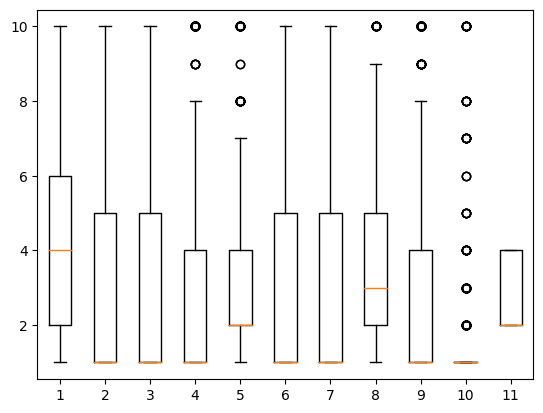

In [78]:
plt.boxplot((
    dataset['Clump Thickness'],               
    dataset['Uniformity of Cell Size'],       
    dataset['Uniformity of Cell Shape'],      
    dataset['Marginal Adhesion'],             
    dataset['Single Epithelial Cell Size'],
    dataset['Bare Nuclei'],   
    dataset['Bare Nuclei'],                   
    dataset['Bland Chromatin'],               
    dataset['Normal Nucleoli'],               
    dataset['Mitoses'],                       
    dataset['Class'] 
))
plt.show()

Matriz de correlación utilizada para identificar posibles redundancias entre atributos de entrada, considerando una correlación superior a 0.85 como indicativo de posible multicolinealidad.

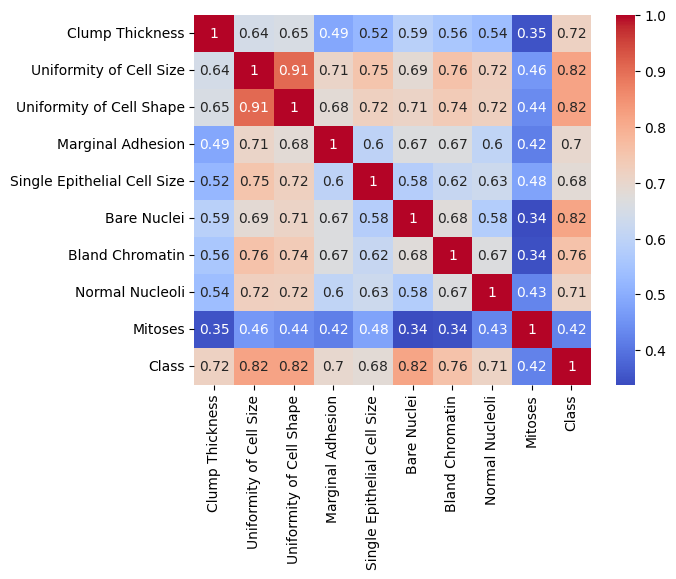

In [79]:
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.show()

En la matriz, se destaca una fuerte correlación entre los atributos 'Uniformity of Cell Size' y 'Uniformity of Cell Shape'. Como medida para prevenir la multicolinealidad, se decide eliminar uno de estos atributos.

In [80]:
dataset.drop(labels=['Uniformity of Cell Shape'], axis=1, inplace=True)
dataset.head()

,Clump Thickness,Uniformity of Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,2,1.0,3,1,1,2
1,5,4,5,7,10.0,3,2,1,2
2,3,1,1,2,2.0,3,1,1,2
3,6,8,1,3,4.0,3,7,1,2
4,4,1,3,2,1.0,3,1,1,2


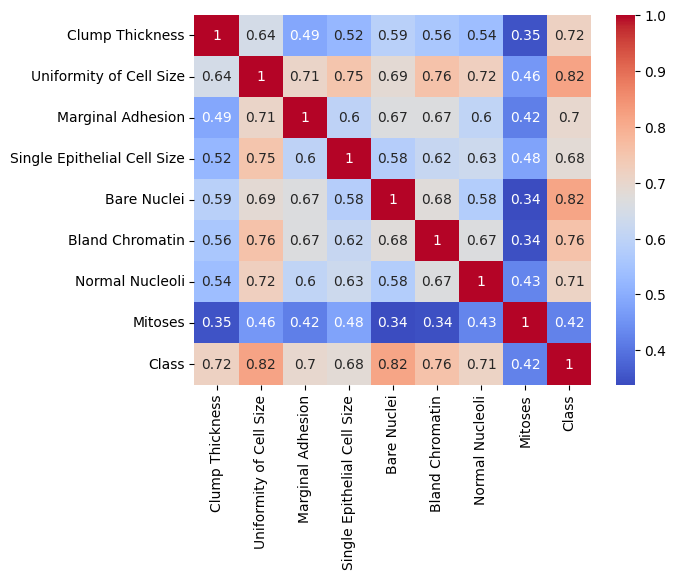

In [81]:
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.show()

A continuación, se lleva a cabo el balanceo de las clases a predecir mediante la estrategia de submuestreo (undersampling).

In [82]:
clase_minoritaria = dataset[dataset['Class'] == 4]
clase_mayoritaria = dataset[dataset['Class'] == 2].sample(len(clase_minoritaria), random_state=42)

#Combinación de las dos clases equitativamente
dataset = pd.concat([clase_mayoritaria, clase_minoritaria])

#Mezcla el dataframe balanceado
dataset = dataset.sample(frac=1, random_state=42)

dataset.head()

,Clump Thickness,Uniformity of Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
421,10,10,7,10,10.0,8,2,1,4
658,7,8,7,3,10.0,7,2,3,4
629,4,1,1,2,1.0,1,1,1,2
530,7,4,3,4,10.0,6,9,1,4
122,10,10,2,10,10.0,5,3,3,4


In [83]:
dataset['Class'].value_counts()

4    241
2    241
Name: Class, dtype: int64

## Parte 5: Modelado

Se divide el conjunto de datos en entrenamiento y prueba

In [84]:
X = dataset.drop(labels=['Class'], axis=1)
y = dataset['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Los atributos de entrada son escalados. Es relevante destacar que durante la inspección del diagrama de caja y bigotes, se identificaron algunos valores atípicos. Por este motivo, se opta por utilizar RobustScaler, un método robusto frente a valores atípicos.

In [85]:
#Se inicializa el escalador
rs = RobustScaler()

#Se escalan los dato de entrenamiento 
X_train_esc = rs.fit_transform(X_train)

#Se aplica las mismas transformaciones al conjunto de entrenamiento
X_test_esc = rs.transform(X_test)


A continuación, se procede con la creación del modelo de regresión logística, su entrenamiento y la realización de predicciones.

In [86]:
#Se inicializa el modelo
rl = LogisticRegression()

#Se entrena el modelo con los datos de entrenamiento escalados
rl.fit(X_train_esc, y_train)

#Se realiza las predicciones en el conjunto de prueba
y_pred = rl.predict(X_test_esc)

En la evaluación del modelo, se emplean la métrica de exactitud y la matriz de confusión.

In [87]:
exactitud = accuracy_score(y_true=y_test, y_pred=y_pred)
print('Accuracy: {:.2f}%'.format(exactitud*100))

Accuracy: 97.24%


Matriz de confusión


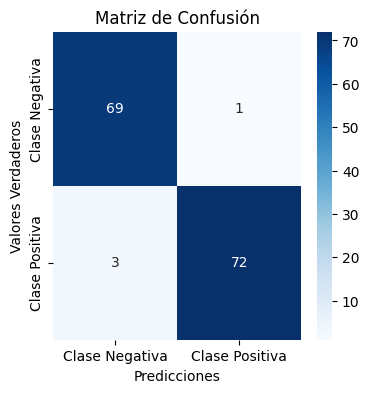

In [88]:
print("Matriz de confusión")

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

# Configurar el tamaño de la figura
plt.figure(figsize=(4, 4))

# Crear la matriz de confusión con seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Clase Negativa', 'Clase Positiva'], 
            yticklabels=['Clase Negativa', 'Clase Positiva'])

# Añadir etiquetas y título
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión')

# Mostrar la matriz de confusión
plt.show()